In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed
seed(1234)

In [2]:
def directSampling(L, sigma) :
    """Sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[0] = sigma + random()*(L-2*sigma)
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

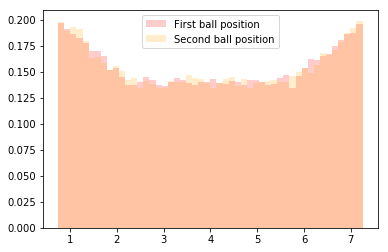

In [3]:
L, sigma = 8, 0.75
H = np.array([directSampling(L, sigma) for i in range(10**5)])
plt.hist(H[:, 0], bins = 50, normed = 1, color = 'red', label = 'First ball position', alpha = 0.2)
plt.hist(H[:, 1], bins = 50, normed = 1, color = 'orange', label = 'Second ball position', alpha = 0.2)
plt.legend()
plt.show()

In [4]:
def wrongSampling(L, sigma) :
    """Wrong sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    pos[0] = sigma + random()*(L-2*sigma)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

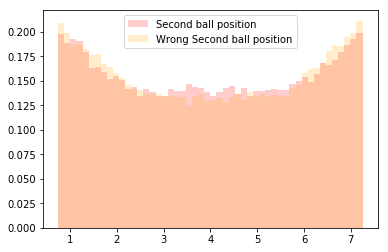

In [6]:
L, sigma = 8, 0.75
W = np.array([wrongSampling(L, sigma) for i in range(10**5)])
plt.hist(H[:, 1], bins = 50, normed = 1, color = 'red', label = 'Second ball position', alpha = 0.2)
plt.hist(W[:, 1], bins = 50, normed = 1, color = 'orange', label = 'Wrong Second ball position', alpha = 0.2)
plt.legend()
plt.show()

In [ ]:
def naiveSampling(n, L, sigma) :
    reject = 0
    acc = False
    while acc != True :
        pos = random(size = n)*(L-sigma) + sigma
        x, y = np.ones((n, n))*pos, np.transpose(np.ones((n, n))*pos)
        z =  np.abs(x - y) >= 2*sigma
        z = np.fill_diagonal(z, True)
        print z
        if np.sum(z) == n*n :
            acc = True
        else :
            reject += 1
            if reject == 10 :
                break;
    return pos, z

In [ ]:
a = naiveSampling(2, 10, 0.1)
a